<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-\amily:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Bias, Variance and the Bias-Variance Tradeoff
              
</p>
</div>

Data Science Cohort Live NYC Nov 2023
<p>Phase 3</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

In [48]:
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
import pandas as pd


#### Sources of error in model-based prediction

- Intrinsic noise / variability in the population
- Bias
- Variance

Break these down and explain these step by step

Random process dependent on feature $X$:

- intrinsic variability in $y$ for given $X$

Property of the underlying population distribution.

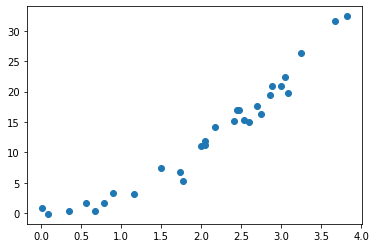

In [49]:
N = 30

# our feature
X = np.sort(uniform.rvs(0, 4, N,  
                        random_state = 10))

# noise/variation of y about population mean given X
intrinsic_noise = norm.rvs(loc = 0, 
                           scale = 1.5, size = N)

y = 2*X**2 + X + intrinsic_noise

plt.scatter(X,y)
plt.show()

The true population average is just the factor independent of noise:

$$ E\Big[y(X)\Big] = 2 X^2 + X$$ 

Recalling that $$ y(X) = 2 X^2 + X + \epsilon $$

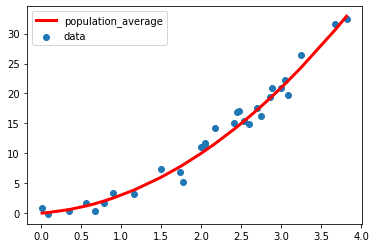

In [50]:

y_pop_avg = 2*X**2 + X
plt.scatter(X,y, label = 'data')
plt.plot(X, y_pop_avg, c = 'r', 
         linewidth = 3, label = 'population_average')
plt.legend()
plt.show()

Even with the line of *true* population means as prediction model:

- will have error due to intrinsic noise

Calculating the mean absolute error from intrinsic sources: $\epsilon_{intrinsic} $

$$ \epsilon_{intrinsic} = \frac{1}{N}\sum_{i=1}^N |y_i - \hat{y}^{popmean}_i| $$

In [51]:
error_intrinsic = np.abs(y - y_pop_avg).mean()
error_intrinsic

1.1071549363976074

In establishing a regression model between target $y$ and given features $X$:
- This source of prediction error will always be there due to intrinsic variability within a population.

No matter the sophistication of your model.

#### Another source of error: model bias 

In regression: model rerepesents line of averages of target conditioned on features $X$

Bias:
- how far away your model is on average from the true population average across features $X$

Look at data again:
- maybe try a linear fit

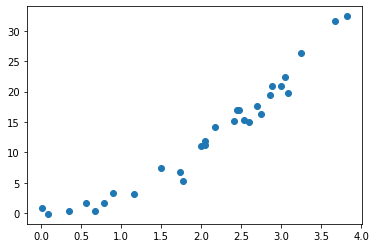

In [52]:
plt.scatter(X,y, label = 'data')
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)

LinearRegression()

In [54]:
slope = lr.coef_
slope

array([8.45581688])

In [55]:
const = lr.intercept_
const

-4.404261796916932

In [56]:
%%capture bias_comparison
xrange = np.linspace(0,4,500)
y_pred_range = slope*xrange + const

plt.scatter(X,y, label = 'data')
plt.plot(xrange, y_pred_range, c = 'g',
         linewidth = 3, label = 'model_fit')
plt.plot(X, y_pop_avg, c = 'r', linestyle = '--',
         linewidth = 3, label = 'population_average')
plt.legend()
plt.show()

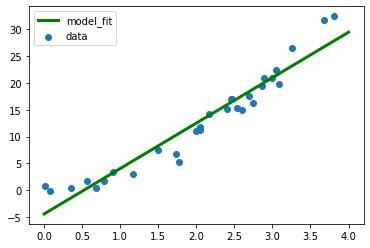

In [57]:
xrange = np.linspace(0,4,500)
y_pred_range = slope*xrange + const

plt.scatter(X,y, label = 'data')
plt.plot(xrange, y_pred_range, c = 'g',
         linewidth = 3, label = 'model_fit')
plt.legend()
plt.show()

Compare this to the line of population means:

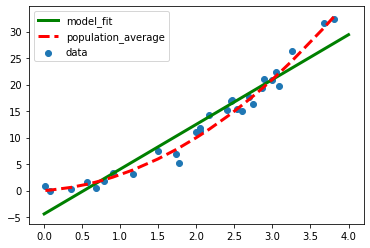

In [58]:
bias_comparison()

Difference between:
- the underlying population average at given $X$
- our model's prediction of this average at given $X$

This difference is known as the **bias**:
- Let's evaluate this:

**Bias**

$$ bias = \frac{1}{N}\sum_{i=1}^N |\hat{y}_i^{model} - \hat{y}_i^{true}| $$

A source of prediction error.



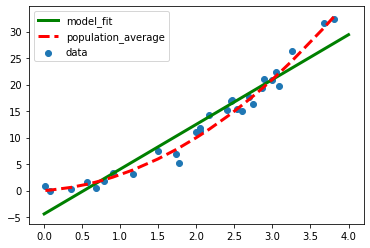

In [59]:
bias_comparison()

In [60]:
y_model = lr.predict(X.reshape(-1,1))
bias_error = np.abs(y_model - y_pop_avg).mean()
bias_error

1.7919559621134342

But what is the source of bias error?

- Wrong functional form
- **Using a model not flexible/complex enough**

Not enough relevant parameters and features to model the data generating process *on average*.

$$ y = w_1 X + w_0 $$

$w_1$, $w_0$ and corresponding feature space with just $X$: not flexible enough

$$ y = w_2 X^2 + w_1 X + w_0 $$

$w_2$, $w_1$, $w_0$ and corresponding feature space of $X$ and $X^2$

- appropriate level of model flexibility

$$ y = w_1 X + w_0 $$

$w_1$, $w_0$ and corresponding feature space with just $X$: not flexible enough

$$ y = w_2 X^2 + w_1 X + w_0 $$

$w_2$, $w_1$, $w_0$ and corresponding feature space of $X$ and $X^2$

- appropriate level of model flexibility

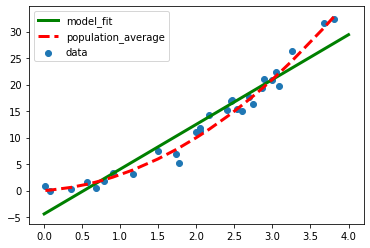

In [61]:
bias_comparison()

- stiff like a plank (low model flexibility)
- bendy and floppy: can respond to data (higher model flexibility)


#### Pumping up that flexibility

If we make it super bendy and floppy:
- model very responsive to data

**Is this good or bad?**

<center><img src = "images/napoleon.gif" ></center>
<center> Vote for Pedro</center>

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [67]:
poly_transformer = PolynomialFeatures(15)
ss = StandardScaler()

# polynomial transform and apply standard scaler to get weights for each order on same scale
X_poly_train = poly_transformer.fit_transform(X.reshape(-1,1))
X_poly_ss_train = ss.fit_transform(X_poly_train)

#fit model with polynomial, scale-transformed features
lr_poly = LinearRegression()
lr_poly.fit(X_poly_ss_train, y)

LinearRegression()

In [68]:
%%capture polyfitting
xrange = np.linspace(0,4,500)

xrange_poly = poly_transformer.transform(xrange.reshape(-1,1)) 
xrange_poly_ss = ss.transform(xrange_poly)
y_poly_range = lr_poly.predict(xrange_poly_ss)

# going in the facebook are the clearing 
fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(X,y, marker = 's', facecolors='none', edgecolors='black', label = 'training data')
ax.plot(X, y_pop_avg, c = 'b', linewidth = 3, linestyle = '--', label = 'population average')
ax.plot(xrange, y_poly_range, c = 'magenta', linewidth = 3, alpha = 0.8, label = 'polynomial 20th order')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()
plt.ylim(-5,50)
plt.show()

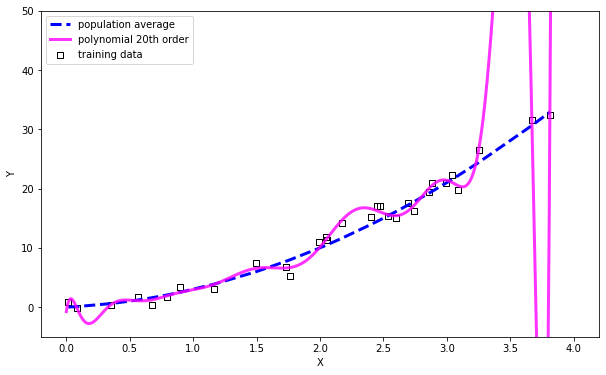

In [69]:
polyfitting()

The model is very flexible:
- accomodates training data better than true population line of means

But also is unstable: accomodates and trains to the noise/fluctuation to well.

The explained variance on training is better:

In [70]:
# R^2 of polynomial regression at order 15
lr_poly.score(X_poly_ss_train, y)

0.9936811316606896

In [71]:
# R^2 of model linear in X
lr.score(X.reshape(-1,1), y)

0.9292597845006418

But what about on data that the model has never seen?

- generate this data following same distribiution as training set.

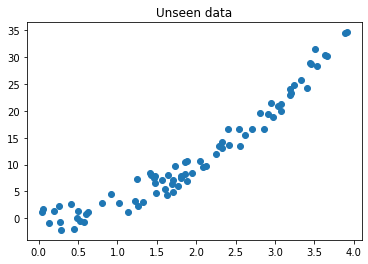

In [72]:
N_test = 80
X_test = np.sort(uniform.rvs(0, 4, N_test))
intrinsic_fluct_test = norm.rvs(loc = 0, 
                           scale = 1.5, size = N_test)
y_test =  2*X_test**2 + X_test + intrinsic_fluct_test

y_pop_avg_tst = 2*X_test**2 + X_test

plt.scatter(X_test, y_test)
plt.title('Unseen data')
plt.show()

Evaluate mean average error of model on this unseen data:
- i.e. how well does this model generalize?

In [73]:
from sklearn.metrics import mean_absolute_error

In [74]:
# polynomial transform test data
X_poly_test = poly_transformer.transform(
    X_test.reshape(-1,1))

# need to also scale test data 
X_poly_ss_test = ss.transform(X_poly_test)

y_pred_poly_ss = lr_poly.predict(X_poly_ss_test)

mean_absolute_error(y_pred_poly_ss, y_test)

27.528280118411686

In [75]:
y_pred = lr.predict(X_test.reshape(-1,1))
mean_absolute_error(y_pred, y_test)

2.348739497573372

This is overfitting and is directly tied to the notion of the **variance** of a model.

Remember: training data is a **sample**.

If we take another training sample from population, is it likely to learn the same model?
- e.g. associated weight vector $\textbf{w}$?

Our old training sample and associated model:

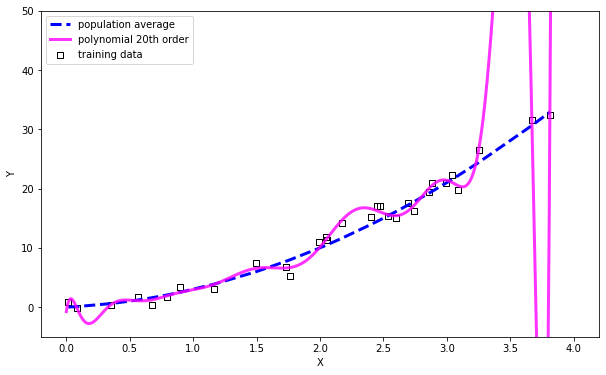

In [76]:
polyfitting()


- Likely to learn another model/parameter set $\textbf{w}$ that is quite different.

Sample some new training data from population

In [77]:
%%capture new_data_vis
N = 30
# new randomly sampled features
X_2 = np.sort(uniform.rvs(0, 4, N,  
                        random_state = 25))

# noise/variation of y about population mean given X
# a different realization
intrinsic_noise = norm.rvs(loc = 0, 
                           scale = 1.5, size = N)

y_2 = 2*X_2**2 + X_2 + intrinsic_noise

plt.scatter(X_2,y_2)
plt.show()

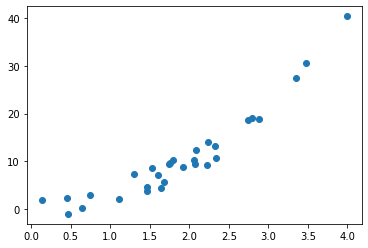

In [78]:
new_data_vis()

Transform and fit this new training sample

In [79]:
poly_transformer = PolynomialFeatures(15)
ss_2 = StandardScaler()
X_2_poly_train = poly_transformer.fit_transform(X_2.reshape(-1,1))
X_2_poly_train_ss = ss_2.fit_transform(X_2_poly_train)

lr_poly_2 = LinearRegression()
lr_poly_2.fit(X_2_poly_train_ss, y_2)

LinearRegression()

In [80]:
%%capture polyfitting_2
xrange = np.linspace(0,4,500)

xrange_poly = poly_transformer.transform(xrange.reshape(-1,1)) 
xrange_poly_ss = ss_2.transform(xrange_poly) 

y_poly_range_2 = lr_poly_2.predict(xrange_poly_ss)

# going in the facebook are the clearing 
fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(X,y, marker = 'o', s = 80, facecolors='none', edgecolors='blue', label = 'first sample')
ax.scatter(X_2,y_2, marker = 's', s = 80, facecolors='none', edgecolors='black', label = 'second sample')

ax.plot(xrange, y_poly_range, c = 'green', linewidth = 3, alpha = 0.8, label = 'model trained on first sample')
ax.plot(xrange, y_poly_range_2, c = 'magenta', linewidth = 3, alpha = 0.8, label = 'model trained on second sample')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()
plt.ylim(-100,100)
plt.show()

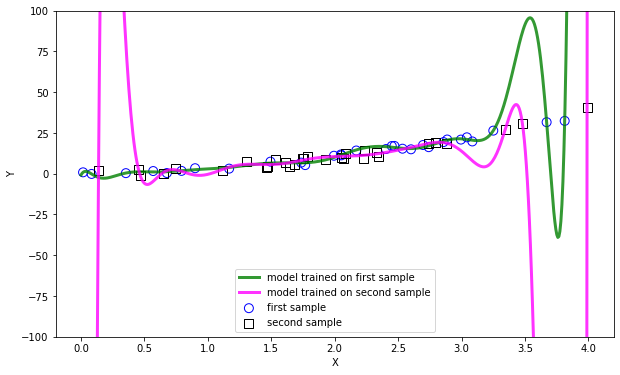

In [81]:
polyfitting_2()

Looking at the model weights:

In [82]:
pd.Series(lr_poly.coef_)

0     0.000000e+00
1     1.511621e+02
2    -1.231338e+04
3     3.441746e+05
4    -5.067458e+06
5     4.618854e+07
6    -2.818870e+08
7     1.202815e+09
8    -3.676036e+09
9     8.137726e+09
10   -1.305404e+10
11    1.500542e+10
12   -1.203370e+10
13    6.387497e+09
14   -2.015141e+09
15    2.858907e+08
dtype: float64

In [83]:
pd.Series(lr_poly_2.coef_)

0     0.000000e+00
1     9.379509e+04
2    -2.614803e+06
3     3.737927e+07
4    -3.375490e+08
5     2.095129e+09
6    -9.353187e+09
7     3.081249e+10
8    -7.590227e+10
9     1.403316e+11
10   -1.937098e+11
11    1.965368e+11
12   -1.421764e+11
13    6.935890e+10
14   -2.043620e+10
15    2.745550e+09
dtype: float64

Really high variability in the learned weight vectors $\textbf{w}$:
- i.e. large fluctuations in learned model 
- oversensitivity to random noise and uncertainty in training set.

**Model variance:**

- the degree to which a model varies given different realizations of the training set.

In our high order polynomial fits to the data:

- introduced too much model complexity

- model over-flexibility: leads to high variance in models learned

This is a situtation with **high model variance**

**Model variance as a source of error**: 

- source of prediction error of model on unseen data
- high variance: fluctuation in test errors of model given different training sets will be high.
- model variance is measure of this **averaged over different realizations of training set**



There is a balancing game in model selection:
- model class can be too stiff (high bias)
- or too floppy (high variance)

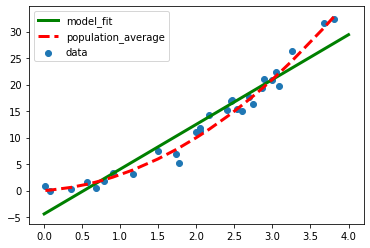

In [84]:
bias_comparison()

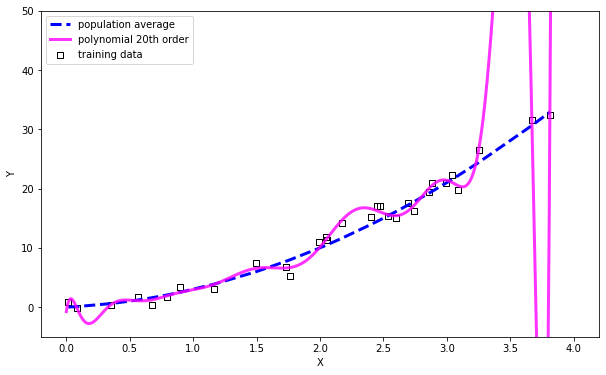

In [85]:
polyfitting()

A little widget to show the influence of model complexity on generalization error:

In [86]:
from IPython.display import display, HTML
display(HTML('index.html'))

- Locally weighted polynomial regression of a sinusoid with noise:
    - increasing complexity at first reduces bias
    - too high and it starts to model noise
    
Tension between bias and variance

Often called the **bias-variance tradeoff**

Thus: average generalization/test error derived from the separate error sources we have considered.

- intrinsic fluctuation
- bias
- variance


**Often called the bias-variance decomposition**

With an interplay/tradeoff between the latter two sources of error.

Much of machine learning focuses on strategies to deal with bias and variance and the tension between them:
- creating models complex enough to capture relationships between targets and relevant features/interactions    
- but making them statistically robust

in the service of acheiving high predictive power on unseen data